<img src="./images/qutip-logo.png">

# General notes
- We will be working with frequencies, and **NOT** energies 
- Qutip is a `python` package designed for running quantum simulations - **specifically open quantum systems**
- Comprehensive documentation is available on [this pdf](qutip-doc-4.5.pdf)

<img src="./images/available_functions.png"/>

In [1]:
import os
from typing import List, Dict, Tuple, Optional
from collections import defaultdict

import numpy as np
import qutip

# Plotting an colouring
# from importlib import reload
# reload(plt) # required to fix import issue
import matplotlib as mpl
from colour import Color
from collections import OrderedDict
# import sys
# sys.modules.pop('matplotlib')
# from matplotlib import pyplot as plt

## Note on Python
`python` uses libraries. They will need to be imported first and the functions of that library are accessed via dots `.`
```python
import scipy
scipy.basis(2,1)
```

Importat libraries for us are
<table class="table table-striped table-bordered table-hover table-condensed">


<colgroup>
<col  class="left">

<col  class="left">
</colgroup>
<thead>
<tr>
<th scope="col" class="text-left"><b>Library</b></th>
<th scope="col" class="text-left">Used for</th>
</tr>
</thead>
<tbody>
<tr>
<td class="text-left"><code>numpy</code></td>
<td class="text-left">Making arrays and matrices</td>
</tr>

<tr>
<td class="text-left"><code>matplotlib</code></td>
<td class="text-left">Plotting graphs</td>
</tr>

<tr>
<td class="text-left"><code>qutip</code></td>
<td class="text-left">Running quantum simulations</td>
</tr>
</tbody>
</table> 

# Making quantum objects -- making matrices
<img src="./images/qobj.png" alt="drawing" width="400"/>

## Manual definition
They can be build by hand

In [4]:
qubit_object = qutip.Qobj([[5, 2 , 1], [2, 4, 2], [1, 2, 5]])
qubit_object

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[5. 2. 1.]
 [2. 4. 2.]
 [1. 2. 5.]]

## Supporting functions definitions
> 361 functions available

<table border="4" cellspacing="50" cellpadding="60" rules="groups" frame="hsides">
<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left"><b>Building object</b></th>
<th scope="col" class="org-left">&#xa0;</th>
</tr>
</thead>
<tbody>
<tr>
<td class="org-left"><code>basis(N, e)</code></td>
<td class="org-left">create <b>Ket</b> with <code>N</code> levels, with excited state at <code>e</code></td>
</tr>

<tr>
<td class="org-left"><code>ket2dm(ket)</code></td>
<td class="org-left">takes a <b>Ket</b> and constructs a density matrix</td>
</tr>

<tr>
<td class="org-left"><code>charge(N, M)</code></td>
<td class="org-left">make diagonal matrix from M..0..N</td>
</tr>

<tr>
<td class="org-left"><code>sigmax/y/z()</code></td>
<td class="org-left">sigma operators</td>
</tr>

<tr>
<td class="org-left"><code>qeye(N)</code></td>
<td class="org-left">identity matrix</td>
</tr>

<tr>
<td class="org-left"><code>num(N)</code></td>
<td class="org-left">number operator (same as charge)</td>
</tr>

<tr>
<td class="org-left"><code>destroy(N)</code></td>
<td class="org-left">anhialation operator for an <code>N</code>-dimensional matrix</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-left"><b>Operating on objects</b></td>
<td class="org-left">&#xa0;</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-left"><code>.eigenstates()</code></td>
<td class="org-left">to access, do [1][eigenstateNo]</td>
</tr>

<tr>
<td class="org-left"><code>.eigenenergies()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.full()</code></td>
<td class="org-left">full matrix representation</td>
</tr>

<tr>
<td class="org-left"><code>.conj()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.groundstate()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.matrix_element(ket,bra)</code></td>
<td class="org-left">make sandwhich of operators</td>
</tr>

<tr>
<td class="org-left"><code>.norm()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.unit()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.transpose()</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>.expm()</code></td>
<td class="org-left">exponential of the matrix</td>
</tr>

<tr>
<td class="org-left"><code>.dag()</code></td>
<td class="org-left">return adjoint</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-left"><b>Higher level functions</b></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>expect(operator, state)</code></td>
<td class="org-left">&#xa0;</td>
</tr>

<tr>
<td class="org-left"><code>tensor(component1, c2, ..)</code></td>
<td class="org-left">&#xa0;</td>
</tr>
</tbody>
</table>

In [6]:
# Basic ket
qutip.basis(3,2)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]]

In [7]:
# Creation of diagonal matrix
qutip.charge(3,-2)

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[-2.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  3.]]

In [8]:
# Evaluation of eigenenergies
val = qubit_object.eigenstates()

for idx, (energy, state) in enumerate(zip(val[0], val[1])):
#     print(f"----------🐳State {idx}🐳----------")
    print(f"Energy: {energy}")
    print(f"State: {state}")

Energy: 2.0
State: Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.40824829]
 [-0.81649658]
 [ 0.40824829]]
Energy: 4.000000000000002
State: Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.70710678]]
Energy: 8.0
State: Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.57735027]
 [-0.57735027]
 [-0.57735027]]


### Raising + lowering operators
- $a^{\dagger}a^{\dagger}\left|0\right\rangle = \sqrt{0+1}\sqrt{1+1}\left|2\right\rangle$
- $a * a^{\dagger}\left|0\right\rangle = \left|0\right\rangle$


In [9]:
# Diagonal matrix for anhialation operator
vac = qutip.basis(5, 0)
display(vac)

a = qutip.destroy(5)
display(a)

display(a.dag() * a.dag() * vac)
display(a * a.dag() * vac)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         1.73205081 0.        ]
 [0.         0.         0.         0.         2.        ]
 [0.         0.         0.         0.         0.        ]]

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [1.41421356]
 [0.        ]
 [0.        ]]

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

### Density matrices
1. Can be constructed by building $\left|2\right\rangle$ and then taking the product
\begin{equation}
\left|2\right\rangle \times \left\langle 2\right|
\end{equation}

2. Or using the pre-build `fock()` operator

In [91]:
c = qutip.basis(5, 2)
display(c * c.dag())

qutip.fock_dm(5,2)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

# Bloch Sphere supporting functions
<img src="./images/simulation-flow.svg">

---

<center><b>Utilised functions</b></center>
<table style="border:1px solid black;margin-left:auto;margin-right:auto;" cellspacing="0" cellpadding="60" rules="groups" frame="hsides">

<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<tbody>
<tr>
<td class="org-left"><code>b = Bloch()</code></td>
<td class="org-left">Sphere on which to plot</td>
</tr>

<tr>
<td class="org-left"><code>b.add_points([[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]])</code></td>
<td class="org-left">Add points</td>
</tr>

<tr>
<td class="org-left"><code>b.add_vectors([[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]])</code></td>
<td class="org-left">Add vectors</td>
</tr>

<tr>
<td class="org-left"><code>b.add_states([state1, state2, state3])</code></td>
<td class="org-left">Add states</td>
</tr>
</tbody>
</table>
</table>


## Supporting plotting functions
- Generate colours
- Saving
- Combining images to single video

In [2]:
CMAPS = OrderedDict()
CMAPS["sequential"] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis',
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
]
CMAPS['cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

ANIMATION_FOLDER = "./animations"

def generate_colormap_for_a_list(list_to_generate: List[float], colormap: str) -> "Colormap":
    assert colormap in CMAPS["sequential"] + CMAPS["cyclic"]
    normalised_list = mpl.colors.Normalize(min(list_to_generate), max(list_to_generate))
    
    return plt.get_cmap(colormap)(normalised_list)
    
def prepare_folder(simulation_name: str):
    """
    Prepares folder to save the animations
    """
    folder_name = f"./temp/{simulation_name}"
    
    os.system(f"rm -rf {folder_name}");
    os.system(f"mkdir -p {folder_name}");
    
def save_with_idx(fig, idx, simulation_name: str):
    """Save plot with an index"""
    save_path = f"./temp/{simulation_name}/{idx:02d}.png"
    fig.savefig(save_path, bbox_inches = 'tight');
    
def build_animation(simulation_name: str):
    """
    Makes and animation from the images made with simulation
    """
    os.system(f"mkdir -p {ANIMATION_FOLDER}")
    os.system(f"rm ./{ANIMATION_FOLDER}/{simulation_name}.mp4");
    os.system(f"ffmpeg -r 10 -i ./{ANIMATION_FOLDER}/{simulation_name}/%01.png {simulation_name}.mp4") 

## Plotting functions
- Create plot
- Plot points and vectors

In [6]:
from qutip. bloch import Bloch
from matplotlib.figure import Figure

def format_bloch_sphere(blch: Bloch):
    """
    Format Bloch sphere for before plotting begins
    """
    blch.point_size = [50]    
    blch.font_size = 30
    
    blch.vector_color = ['r']
    blch.sphere_color = "#ffe7ba"
    blch.frame_color = "#8b7355"
    
    blch.xlabel = [r"$\left\langle\sigma_x\right\rangle$", ""]
    blch.ylabel = [r"$\left\langle\sigma_y\right\rangle$", ""]
    blch.zlabel = [r"$\left\langle\sigma_z\right\rangle$", ""]

#     blch.make_sphere()

def prepare_figure_and_folder_for_simulation(simulation_name: str) -> Tuple[Figure, "Axis", Bloch]:
    """
    Create a bloch sphere and 2 axes to plot the sigmax and sigmaz evolution on
    """
    fig = plt.figure(figsize=(2,2))
    axes = {}
    
    # Add Bloch sphere
    axes["bloch-sphere"] = fig.add_axes([0., 0., 2, 1.4], projection='3d')
    #blch = Bloch(axes=axes["bloch-sphere"])
    #format_bloch_sphere(blch)
    blch = 1
    
    # Add axes for expectation value
    axes["sigma-z"] = fig.add_axes([2.2, 0.75, 2, 0.5])
    axes["sigma-x"] = fig.add_axes([2.2, 0.15, 2, 0.5], sharex=axes["sigma-z"])
    for name in ["sigma-z", "sigma-x"]:
        axes[name].tick_params(axis='both', which='major', labelsize=20)
        axes[name].set_yticks([-1, -0.5, 0, 0.5, 1])
        axes[name].set_yticklabels(["-1", "-0.5", "0", "0.5", "1"]) 
        axes[name].set_ylim([-1,1])
        axes[name].grid(True, which='both')
        
    axes["sigma-z"].set_title("$\sigma_z$", size = 40, pad = 20, color = 'red')
    axes["sigma-x"].set_title("$\sigma_x$", size = 40, pad = 20, color = 'blue')
    axes["sigma-x"].set_xlabel('time (arb)', size = 20)
    axes["sigma-x"].set_xlim([0,1])

    prepare_folder(simulation_name)
    
    return (fig, axes, blch)

def plot_points_and_update_vector_on_bloch_sphere(
    blch: Bloch,
    x_point_list: List[float], y_point_list: List[float], z_point_list: List[float]
):
    """Plot [x0, x1, x2, ..., xn], [y0, y1, y2, ..., yn] and [z0, z1, z2, ..., zn] as point
       Plot [xn, yn, zn] as a vector
    """
    blch.clear();
    #blch.add_vectors([x_point_list[-1], x_point_list[-1], x_point_list[-1]]);
    #blch.add_points([x_point_list, y_point_list, z_point_list], 'm');
    blch.add_points([[], y_point_list, z_point_list], 'm')
    blch.make_sphere()

<IPython.core.display.Javascript object>


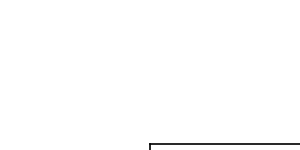

In [5]:
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

plt.plot([1,2,3],[4,5,6])
plt.show()

<IPython.core.display.Javascript object>


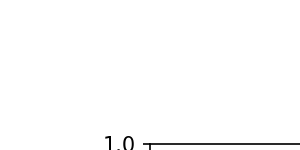

In [3]:
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
%matplotlib notebook


fig = plt.figure(figsize=(3,4))
axes = {}

# Add Bloch sphere
# axes["bloch-sphere"] = fig.add_axes([0., 0., 2, 1.4], projection='3d')
#blch = Bloch(axes=axes["bloch-sphere"])
#format_bloch_sphere(blch)
blch = 1

# Add axes for expectation value

ax = fig.add_subplot(222)
ax1 = fig.add_subplot(224)
ax2 = fig.add_subplot(121)

ax1.get_shared_x_axes().join(ax1, ax2)
ax.plot([1,2,3],[4,5,6])

# Generating simulation

## Building states through combinations of kets
**Remember that in `qutip`:** 
- $\begin{pmatrix}1\\0\end{pmatrix}$ is the excited state
- $\begin{pmatrix}0\\1\end{pmatrix}$ is the ground state
\begin{equation}
\frac{\left|0\right\rangle + \left|1\right\rangle}{2} = \text{Normalized}
\big( \left|0\right\rangle + \left|1\right\rangle \big)
\end{equation}

In [94]:
state_dictionary = {}
state_dictionary["|1>"] = qutip.basis(2,0)
state_dictionary["|0>"] = qutip.basis(2,1)
state_dictionary["|0>+|1>"] = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
state_dictionary["|0>-|1>"] = (qutip.basis(2,0) - qutip.basis(2,1)).unit()
state_dictionary["|0>+i|1>"] = (qutip.basis(2,0) + 1j * qutip.basis(2,1)).unit()
state_dictionary["|0>-i|1>"] = (qutip.basis(2,0) - 1j * qutip.basis(2,1)).unit()

## Defining expectation values
\begin{equation}
  \left\langle\sigma_i\right\rangle = \left\langle \Psi \right| \hat{\sigma}_i\left|\Psi\right\rangle
\end{equation}

In [95]:
from qutip import Qobj

def expx(state: Qobj) -> float:
    return qutip.expect(qutip.sigmax(), state)
def expy(state: Qobj) -> float:
    return qutip.expect(qutip.sigmay(), state)
def expz(state: Qobj) -> float:
    return qutip.expect(qutip.sigmaz(), state)

## Define a simple Hamiltonian for a two level system, undergoing unitary evolution
> Remember that we are working in frequencies and not energies

1. Hamiltonian of the system
\begin{equation}
  \mathcal{H} = \frac{\omega}{2} \sigma_z = \frac{\omega}{2} \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}.
\end{equation}

2. Is subject to unitary evolution:
\begin{equation}
 \begin{aligned}
  U(t) = e^{-i\mathcal{H}t} & = e^{-i\frac{\omega t}{2}\sigma_z}\\
  & = \begin{pmatrix} e^{\omega t/2} & 0 \\ 0 & e^{-\omega t/2} \end{pmatrix}
  \end{aligned}
\end{equation}

<details>
<summary>Simple proof</summary>
\begin{equation}\label{uniRotation}
 \begin{aligned}
 U &= \exp\bigg[i\alpha\sigma_j\bigg] = \sum_{k}\frac{(i\alpha)^k}{k!}\sigma_j^k \\&= \sum_{k=0}\frac{{\alpha^{2k}(-1)^k}}{2k}\mathbb{I}+i\sum_{k=0}\frac{{\alpha^{2k+1}(-1)^k}}{2k+1}\sigma_j\\
 &= \cos(\alpha)\mathbb{I}+i\sin(\alpha)\sigma_j,
 \end{aligned}
\end{equation}
</details>

3. Which results in an expectation value

\begin{equation}
     \left\langle\sigma_z\right\rangle = \left\langle \Psi(0)\,U^{\dagger}\,\right| \hat{\sigma}_z \left|\,U^{\dagger}\,\Psi(0)\right\rangle
\end{equation}

4. But we will simply use `qutip`'s functions to do that

In [96]:
NO_POINTS = 10
OMEGA = 2
END_TIME = 10
H = float(OMEGA) / 2 * qutip.sigmaz()

time_points = np.linspace(0, 1, NO_POINTS)
display(H)
display(time_points)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

## Run simulation
We will store the coordinates in a dictionary called `point_list`:
```python
point_list = {
    "x": [x1, x2, x3, ..., xn],
    "y": [y1, y2, y3, ..., yn],
    "z": [z1, z2, z3, ..., zn],
}
```

In [1]:
fig, ax, blch = prepare_figure_and_folder_for_simulation("test-simulation")

NameError: name 'prepare_figure_and_folder_for_simulation' is not defined

In [103]:
%matplotlib inline


t = 0.1

U = (-1.j * H * t).expm();
evolved_state = U * state_dictionary["|0>+|1>"]

point_list = defaultdict(list)
point_list["x"].append(np.real(expx(evolved_state)))
point_list["y"].append(np.real(expy(evolved_state)))
point_list["z"].append(np.real(expz(evolved_state)))  

ax["sigma-z"].plot(t, point_list["z"][-1], 'o', c = 'red')
ax["sigma-x"].plot(t, point_list["x"][-1], 'o', c = 'blue')

ax["sigma-z"].plot(t, point_list["z"][-1], 'o', c = 'red')
plt.show()

In [104]:
t = 0.2

U = (-1.j * H * t).expm();
evolved_state = U * state_dictionary["|0>+|1>"]

point_list = defaultdict(list)
point_list["x"].append(np.real(expx(evolved_state)))
point_list["y"].append(np.real(expy(evolved_state)))
point_list["z"].append(np.real(expz(evolved_state)))  

ax["sigma-z"].plot(t, point_list["z"][-1], 'o', c = 'red')
ax["sigma-x"].plot(t, point_list["x"][-1], 'o', c = 'blue')

ax["sigma-z"].plot(t, point_list["z"][-1], 'o', c = 'red')
plt.show()

NameError: name 'z_point_list' is not defined

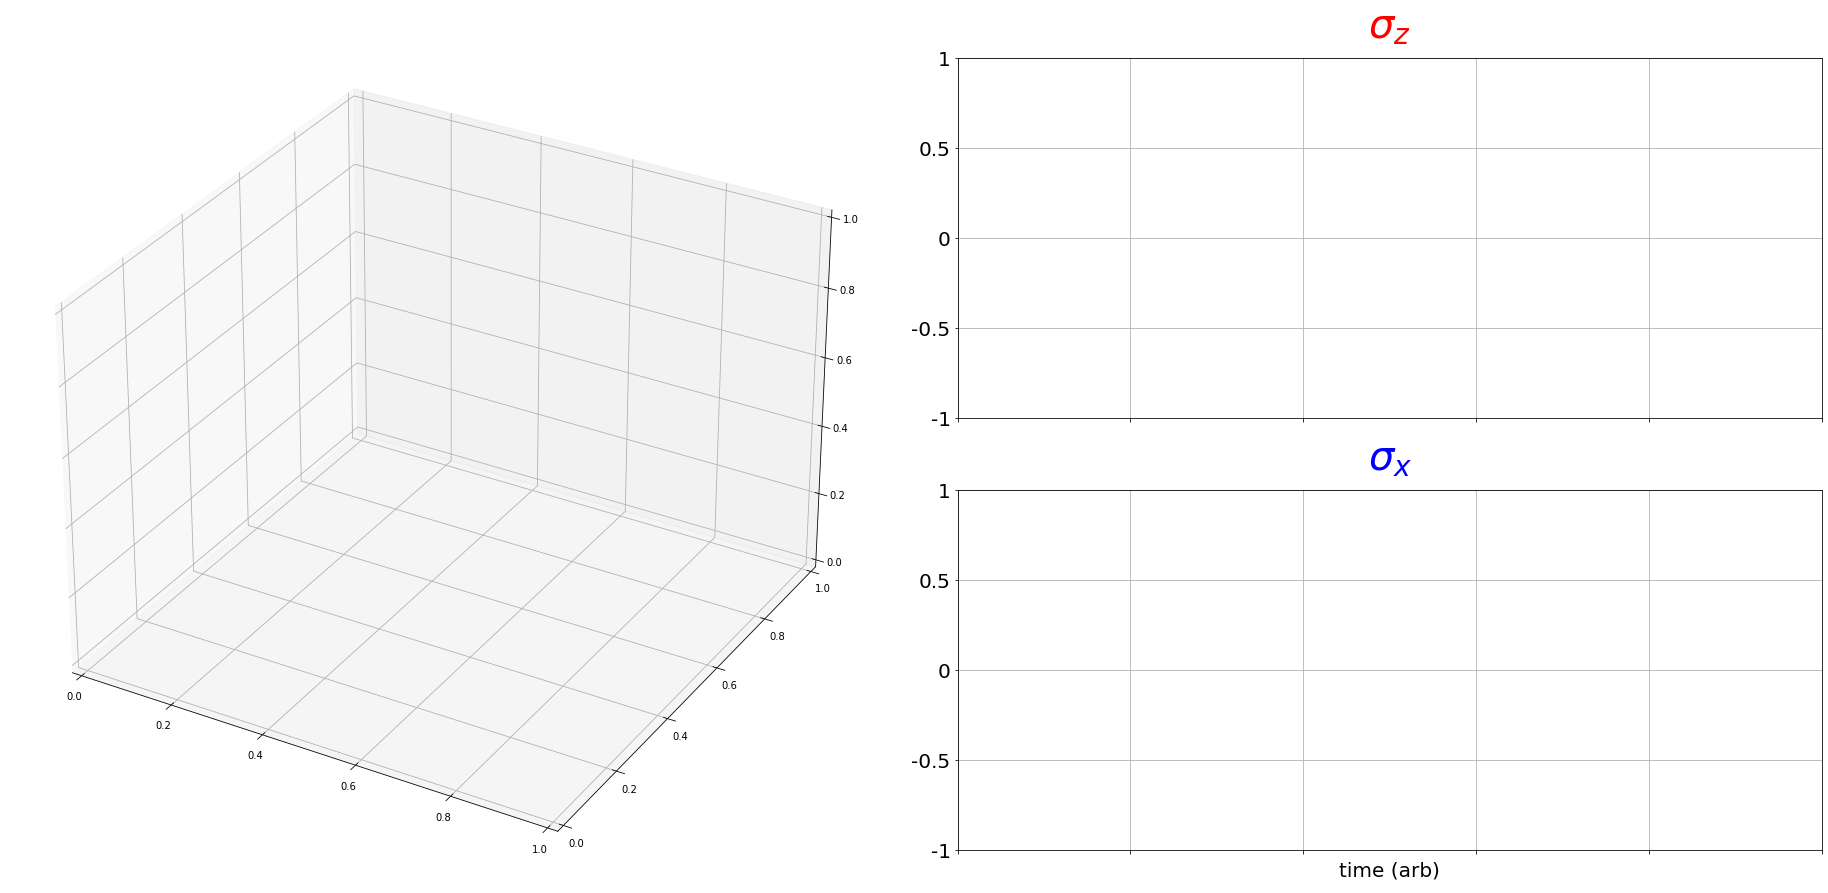

In [59]:


for t in time_points:

    
    U = (-1.j * H * 1).expm();
    evolved_state = U * state_dictionary["|1>"]
    
    point_list["x"].append(np.real(expx(evolved_state)))
    point_list["y"].append(np.real(expy(evolved_state)))
    point_list["z"].append(np.real(expz(evolved_state)))    

    blch.clear();
    #blch.add_vectors([point_list["x"][-1], point_list["y"][-1], point_list["z"][-1]])
    #blch.add_points([point_list["x"], point_list["y"], point_list["z"]], 'm')
    #blch.add_points([x_point_list, y_point_list, z_point_list], 'm')
    #blch.make_sphere()
    
    
    #save_with_idx(fig, idx, "test-simulation")

#     plot_points_and_update_vector_on_bloch_sphere(blch, point_list["x"], point_list["y"], point_list["z"])
    # array[-1] takes the last value from array
    
    

In [29]:
build_animation("test-simulation")

## Simulation functions


In [31]:
from qutip import *
from scipy import *
import os;
from colour import Color
import numpy as np
import matplotlib.pyplot as plt

def evl_detailed(H, stt, blch, no_points, run_name, freq, fig, unitary):
    """
    Evaluate the evolution under H of the initial state stt 

    H    Hamiltonian of the system
    stt  The initial state of the system
    blch Bloch sphere
    no_points is number of frames to make
    run_name is unique identifier
    frq  gives the frequency of rotation - can be used for a smooth animation
    fig  is the figure with the x (1) and z (2) axes
    """
    
    ax = fig.axes;
    temp_point_x = []; temp_point_y = []; temp_point_z = [];
    
    for i in range(no_points):
        period = 2*pi/freq;
        time = 2*period*float(i)/no_points;
        
        #apply the evolution operator onto the state
        U = (-1.j * H * time).expm();
        evolved_state = U * stt;
        
        #find the expectation values
        x = real(expx(evolved_state)); y = real(expy(evolved_state)); z = real(expz(evolved_state));
        temp_point_x.append(x);
        temp_point_y.append(y);
        temp_point_z.append(z);

        #plot on the bloch sphere
        blch.clear();
        blch.add_vectors([float(x), float(y), float(z)]);
        blch.add_points([temp_point_x, temp_point_y, temp_point_z], 'm');
        blch.make_sphere();
        
        #plot on the axes
        ax[1].plot(float(1)/no_points*i, z, 'o', c = 'red');
        ax[2].plot(float(1)/no_points*i, x, 'o', c = 'blue');
        
        save_bloch_detailed(run_name, i, fig, blch);
        
def evl_detailed_unitary(H, stt, blch, no_points, run_name, freq, unitary_func):
    """
    Evaluate the evolution under H of the initial state stt.
    If a unitary transformation has been applied to get into a rotating frame, then 
    the state vectors are inverted!

    H    Hamiltonian of the system
    stt  The initial state of the system
    blch Bloch sphere
    no_points is number of frames to make
    run_name is unique identifier
    frq  gives the frequency of rotation - can be used for a smooth animation
    fig  is the figure with the x (1) and z (2) axes
    unitary_func  is the unitary transformation that we applied to get H
    """
    ax = fig.axes;
    temp_point_x = []; temp_point_y = []; temp_point_z = [];
    
    for i in range(no_points):
        period = 2*pi/freq;
        time = 2*period*float(i)/no_points;
        
        #apply the evolution operator onto the state
        U = (-1.j * H * time).expm();
        evolved_state = U * stt;
        #correct for the untiary evolution we applied
        U0_dag = unitary_func(time).dag();
        evolved_state = U0_dag * evolved_state;
        
        #find the expectation values
        x = real(expx(evolved_state)); y = real(expy(evolved_state)); z = real(expz(evolved_state));
        temp_point_x.append(x);
        temp_point_y.append(y);
        temp_point_z.append(z);

        #plot on the bloch sphere
        blch.clear();
        blch.add_vectors([float(x), float(y), float(z)]);
        blch.add_points([temp_point_x, temp_point_y, temp_point_z], 'm');
        blch.make_sphere();
        
        #plot on the axes
        ax[1].plot(float(1)/no_points*i, z, 'o', c = 'red');
        ax[2].plot(float(1)/no_points*i, x, 'o', c = 'blue');
        
        save_bloch_detailed(run_name, i, fig, blch);
        
        
def evl_master_detailed(H, stt, blch, no_points, run_name, dissapation, fig):
    """
    Evaluate the evolution under H of the initial state stt and plot the sigmaz and sigmax alongside

    H    Hamiltonian of the system
    stt  The initial state of the system
    blch Bloch sphere
    no_points is number of frames to make
    run_name is unique identifier
    dissapation is the Linbland term
    fig  is the figure with the x (1) and z (2) axes
    """
    times = linspace(0, 15, no_points);
    
    #sometimes there are more than one type of dissapation
    if(isinstance(dissapation, (list))):
        result = mesolve(H, stt, times, dissapation, [sigmax(), sigmay(), sigmaz()]);
    else:
        result = mesolve(H, stt, times, [dissapation], [sigmax(), sigmay(), sigmaz()]);
    
    ax = fig.axes;
    temp_point_x = []; temp_point_y = []; temp_point_z = []; time_point = [];
    
    
    for i in range(no_points):    
        temp_point_x.append(result.expect[0][i]);
        temp_point_y.append(result.expect[1][i]);
        temp_point_z.append(result.expect[2][i]);
        
        #plot on the bloch sphere
        blch.clear();
        blch.add_vectors([result.expect[0][i], result.expect[1][i], result.expect[2][i]]);
        blch.add_points([temp_point_x, temp_point_y, temp_point_z], 'm');
        blch.make_sphere();
        
        #plot on the axes
        ax[1].plot(float(1)/no_points*i, result.expect[2][i], 'o', c = 'red');
        ax[2].plot(float(1)/no_points*i, result.expect[0][i], 'o', c = 'blue');
        
        save_bloch_detailed(run_name, i, fig, blch);

In [ ]:
no_points = 40;
run_list = [];

run_list.append(["noDrive_noDissapataion", ket2dm(stt_rnd)]);

#system state and Hamiltonian
omega = 2;
H = float(omega)/2*sigmaz();

#create animation
counter = 0;
for run in run_list:
    #extract run elements
    run_name = run[0];
    initial_state = run[1];
    
    #prepare sphere and map evolution
    blch, fig = prepare_run_detailed(run_name);
    evl_detailed(H, initial_state, blch, no_points, run_name, float(omega), fig);
    evl_animate(run_name);
    
    counter = counter + 1;
    print("Finished run " + str(counter) + "/" + str(len(run_list)));

## No external driving

## With external driving

In [ ]:
### Same as above, but we exit the rotating frame
no_points = 40;

run_list = [];
run_list.append(["drive_noDissapation_ROTATING", stt_relaxed]);

#system state and Hamiltonian. 
#here we enter the rotating frame at the frequency of the drive (== energy splitting of the atom) 
#and remove the fast rotating terms
#now we are considering the system where |0> and |1> are at the same energy, and their superpositions
#are the new eigenstates of the system
initial_state = stt_relaxed;
omega = float(2);
Omega = float(10);
H = Omega/2*sigmax();
def unitary_00(t):
    #This unitary transformation put us into the rotating frame , in which |0> and |1> are at the same energies
    return (-1.0j * 2 / 2 * t * sigmaz()).expm();

#prepare sphere and map evolution
blch = evl_prepare(run_name); 
evl_map_freq_unitary(H, initial_state, blch, no_points, run_name, 4, unitary_00)
evl_animate(run_name)

## Dissapation, No drive

In [11]:
no_points = 60;
run_list = [];

#run_list.append(["noDrive_@Superposition_Relaxation_Dephasing", ket2dm(stt_supp), 0.3, 0.1]);
#run_list.append(["noDrive_@Superposition_Relaxation", ket2dm(stt_supp), 0.1, 0]);
#run_list.append(["noDrive_@Superposition_Dephasing", ket2dm(stt_supp), 0, 0.1]);
#run_list.append(["noDrive_@Excited_Relaxation_Dephasing", ket2dm(stt_excited), 0.1, 0.1]);
#run_list.append(["noDrive_@Excited_Relaxation", ket2dm(stt_excited), 0.1, 0]);

#raw Hamiltonian of the two level system
omega = 2;
H = float(omega)/2 * sigmaz();

#repeat for all runs
counter = 0;
for run in run_list:
    #extract run elements
    run_name = run[0];
    initial_state = run[1];
    Gamma_1 = run[2];
    Gamma_Phi = run[3];
    
    #define dissapation
    dissapation = [np.sqrt(Gamma_1)*sigmam(), np.sqrt(Gamma_Phi/2)*sigmaz()];

    #prepare sphere and map evolution
    blch, fig = prepare_run_detailed(run_name);
    evl_master_detailed(H, initial_state, blch, no_points, run_name, dissapation, fig);
    evl_animate(run_name);
    
    counter = counter + 1;
    print("Finished run " + str(counter) + "/" + str(len(run_list)));

## Dissapation, No drive, ROTATING FRAME

0.3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:168: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead


Finished run 1/1


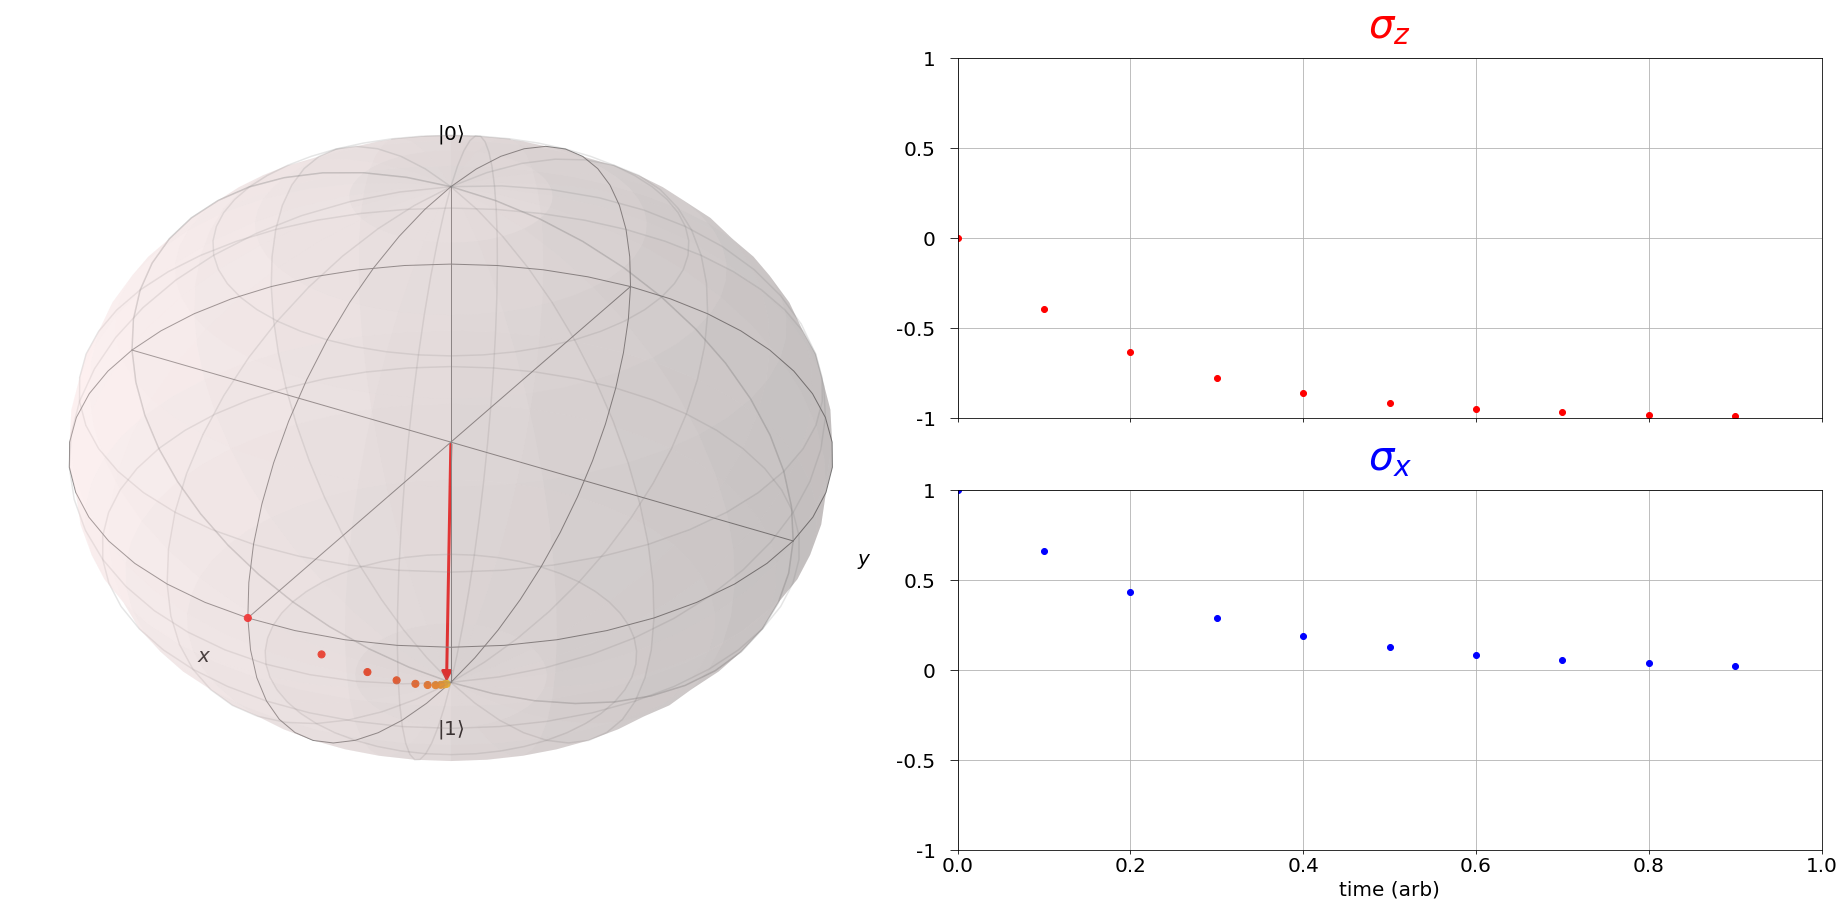

<Figure size 360x360 with 0 Axes>

In [12]:
no_points = 10;
run_list = [];
run_list.append(["test", ket2dm(stt_supp), 0.3, 0.1]);
#run_list.append(["noDrive_@Superposition_Relaxation_Dephasing_ROTATING", ket2dm(stt_supp), 0.3, 0.1]);
#run_list.append(["noDrive_@Superposition_Relaxation_ROTATING", ket2dm(stt_supp), 0.3, 0]);
#run_list.append(["noDrive_@Superposition_Dephasing_ROTATING", ket2dm(stt_supp), 0, 0.1]);
#run_list.append(["noDrive_@Excited_Relaxation_Dephasing_ROTATING", ket2dm(stt_excited), 0.1, 0.1]);
#run_list.append(["noDrive_@Excited_Relaxation_ROTATING", ket2dm(stt_excited), 0.1, 0]);

#raw Hamiltonian of the two level system
omega = 2;
H = float(omega)/2 * sigmaz() - omega/2 * sigmaz(); #in the rotating frame, we negatve the effect of this Hamiltonian
#repeat for all runs
counter = 0;

for run in run_list:
    #extract run elements
    run_name = run[0];
    initial_state = run[1];
    Gamma_1 = run[2];
    print(run[2])
    Gamma_Phi = run[3];
    
    #define dissapation
    dissapation = [np.sqrt(Gamma_1)*sigmam(), np.sqrt(Gamma_Phi/2)*sigmaz()];

    #prepare sphere and map evolution
    blch, fig = prepare_run_detailed(run_name);
    evl_master_detailed(H, initial_state, blch, no_points, run_name, dissapation, fig);
    evl_animate(run_name);
    
    counter = counter + 1;
    print("Finished run " + str(counter) + "/" + str(len(run_list)));

## Dissapation, Driving

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:168: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead


Finished run 1/1


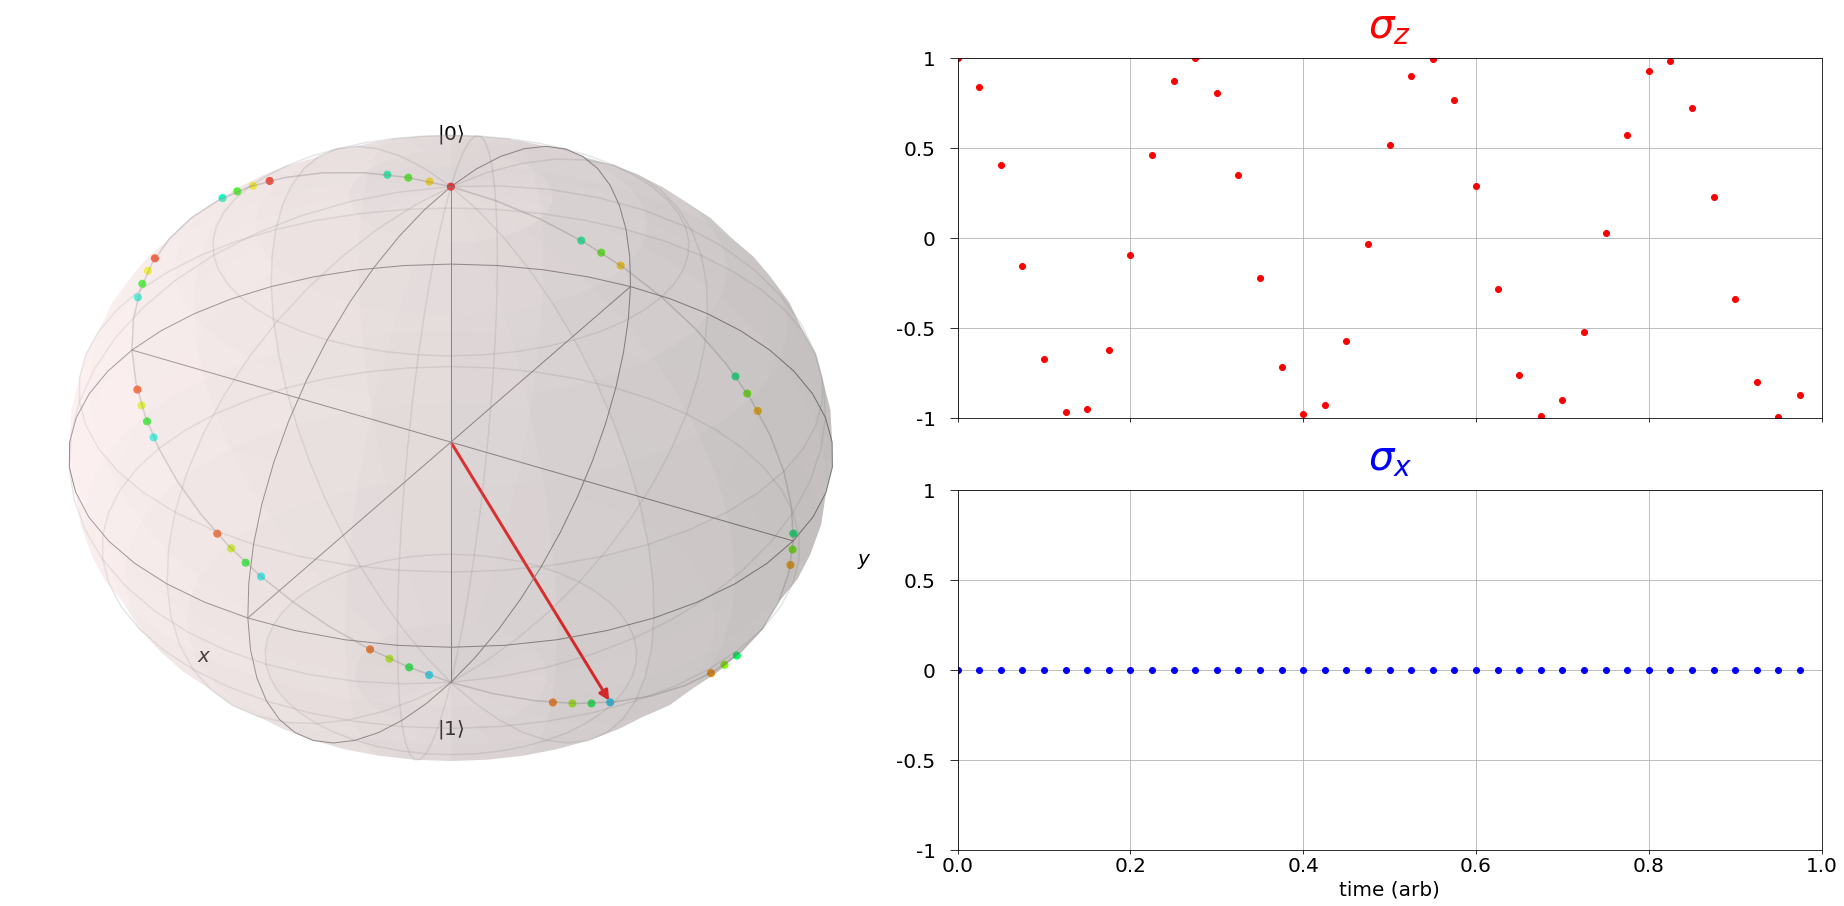

<Figure size 360x360 with 0 Axes>

In [13]:
no_points = 40;
run_list = [];

run_list.append(["drive_@Excited_Relaxation_Dephasing", ket2dm(stt_excited), 0.2, 0.1]);
"""run_list.append(["drive_@Excited_Relaxation", ket2dm(stt_excited), 0.2, 0]);
run_list.append(["drive_@Excited_Dephasing", ket2dm(stt_excited), 0, 0.4]);
run_list.append(["drive_@Superposition_Relaxation_Dephasing", ket2dm(stt_supp), 0.6, 0.1]);
run_list.append(["drive_@Superposition_Relaxation", ket2dm(stt_supp), 0.3, 0]);
run_list.append(["drive_@Superposition_Dephasing", ket2dm(stt_supp), 0, 0.2]);
"""

#here we enter the rotating frame at the frequency of the drive (energy splitting of the atom) 
#and remove the fast rotating terms
omega = 2;
Omega = 1.5;
phi = 0;
H = float(Omega)/2*(sin(phi)*sigmay() + cos(phi)*sigmax());

#repeat for all runs
counter = 0;
for run in run_list:
    #extract run elements
    run_name = run[0];
    initial_state = run[1];
    Gamma_1 = run[2];
    Gamma_Phi = run[3];
    
    #define dissapation (check Ilya Notes summary if not sure)
    dissapation = [np.sqrt(Gamma_1)*sigmam(), np.sqrt(Gamma_Phi/2)*sigmaz()];
    dissapation = []

    #prepare sphere and map evolution
    blch, fig = prepare_run_detailed(run_name);
    evl_master_detailed(H, initial_state, blch, no_points, run_name, dissapation, fig);
    evl_animate(run_name);
    
    counter = counter + 1;
    print("Finished run " + str(counter) + "/" + str(len(run_list)));

# Extensions
- Time-dependent Hamiltonians
- More compex systems can be solved using the **Linbland solver**
- Monte Carlo Solver
- Stochastic Solver
- Steady state solitions
- Running simulations in parallel
- Even more visualisation

In all cases, the best resource is the official documentation in [this pdf](qutip-doc-4.5.pdf). 

> **160/390 pages are examples**. The rest is a reference on how to use the different functions


## Correlation functions
<img src="./images/correlation.png"/>

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7.]]

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.00184254 0.00494126 0.00756401 0.01400893 0.01098394 0.02368518
  0.00724179 0.02876092]
 [0.00494126 0.01325129 0.02028487 0.03756862 0.02945631 0.06351799
  0.01942076 0.07712994]
 [0.00756401 0.02028487 0.03105175 0.05750945 0.04509124 0.09723233
  0.02972899 0.11806928]
 [0.01400893 0.03756862 0.05750945 0.10651047 0.08351131 0.18007929
  0.05505962 0.21867041]
 [0.01098394 0.02945631 0.04509124 0.08351131 0.06547844 0.14119417
  0.04317042 0.17145218]
 [0.02368518 0.06351799 0.09723233 0.18007929 0.14119417 0.30446352
  0.09309036 0.36971026]
 [0.00724179 0.01942076 0.02972899 0.05505962 0.04317042 0.09309036
  0.02846258 0.11303969]
 [0.02876092 0.07712994 0.11806928 0.21867041 0.17145218 0.36971026
  0.11303969 0.44893941]]

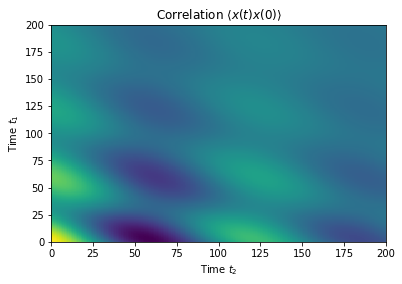

In [113]:
times = np.linspace(0, 10.0, 200)

a = qutip.destroy(8)
x = a.dag() + a
H = a.dag() * a
display(H)

ALPHA = 2.5
rho0 = qutip.coherent_dm(8, ALPHA)
display(rho0)

corr = qutip.correlation_2op_2t(H, rho0, 
                          times, times, 
                          [np.sqrt(0.25) * a], 
                          x, x)

plt.pcolor(np.real(corr))
plt.xlabel(r"Time $t_2$")
plt.ylabel(r"Time $t_1$")
plt.title(r"Correlation $\left<x(t)x(0)\right>$")
plt.show()

## Emission spectrum
\begin{equation}
 S\left(\omega\right) = \int_{-\infty}^{+\infty}\langle A(\tau)B(0)\rangle e^{-i\omega\tau}d\tau
\end{equation}

Calculate the correlation function using the mesolve solver, and then fft to obtain the spectrum

In [119]:
N = 4                 # number of cavity fock states 
wc = wa = 1.0 * 2 * np.pi # cavity and atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength
kappa = 0.75          # cavity dissipation rate
gamma = 0.25          # atom dissipation rate

In [125]:
# Jaynes-Cummings Hamiltonian
a  = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
sm = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
display(H)

# Collapse operators
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          6.28318531  0.62831853  0.          0.          0.
   0.          0.        ]
 [ 0.          0.62831853  6.28318531  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         12.56637061  0.88857659  0.
   0.          0.        ]
 [ 0.          0.          0.          0.88857659 12.56637061  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         18.84955592
   1.08827962  0.        ]
 [ 0.          0.          0.          0.          0.          1.08827962
  18.84955592  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         25.13274123]]

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


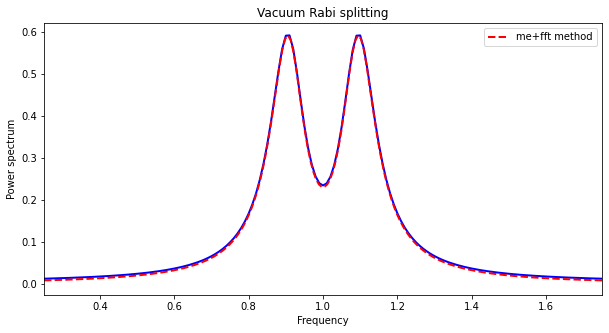

In [138]:
tlist = np.linspace(0, 100, 5000)
corr = qutip.correlation_2op_1t(H, None, tlist, c_ops, a.dag(), a) 
wlist1, spec1 = qutip.spectrum_correlation_fft(tlist, corr)

wlist2 = np.linspace(0.25, 1.75, 200) * 2 * np.pi
spec2 = qutip.spectrum(H, wlist2, c_ops, a.dag(), a)

# plot the spectra
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2)
ax.plot(wlist2 / (2 * np.pi), spec2, 'r--', lw=2, label='me+fft method')
ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(wlist2[0]/(2*np.pi), wlist2[-1]/(2*np.pi))
plt.show()

## Visualising matrix
\begin{equation}
 \mathcal{H} = a^{\dagger}a \otimes \mathbf{I}_{b}  + \mathbf{I}_a \otimes \sigma_{xb} - \frac{1}{2} \left( a b^{\dagger} + a^{\dagger} b \right)
 \end{equation}


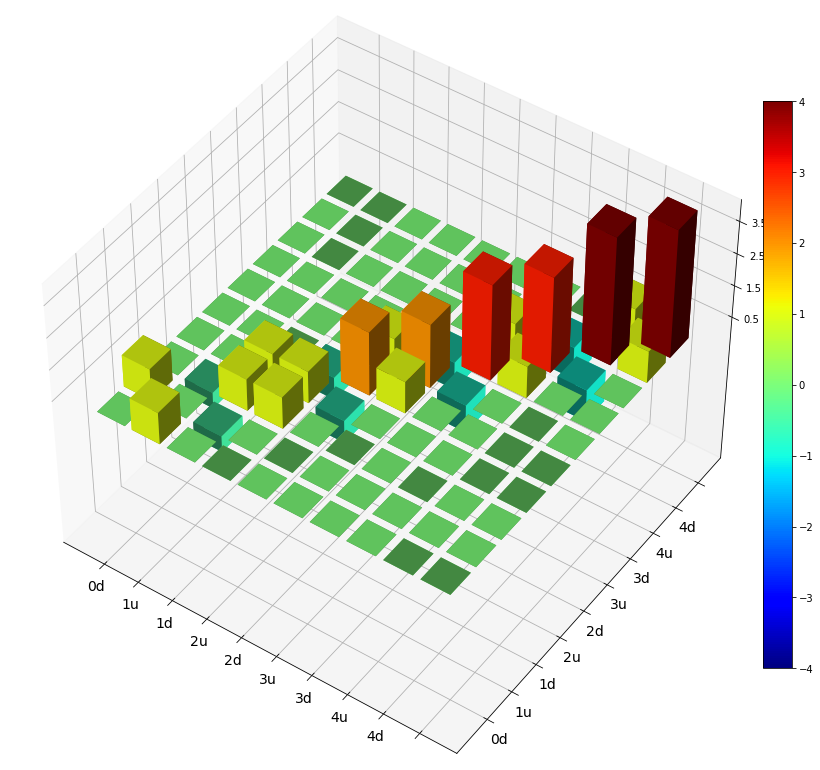

In [101]:
N = 5
a = qutip.tensor(qutip.destroy(N), qutip.qeye(2))
b = qutip.tensor(qutip.qeye(N), qutip.destroy(2))
sx = qutip.tensor(qutip.qeye(N), qutip.sigmax())
H = a.dag() * a + sx - 0.5 * (a * b.dag() + a.dag() * b)

# set labels
lbls_list = [[str(d) for d in range(N)], ["u", "d"]]
xlabels = []
for inds in qutip.tomography._index_permutations([len(lbls) for lbls in lbls_list]):
    xlabels.append("".join([lbls_list[k][inds[k]]
                            for k in range(len(lbls_list))]))
    
fig, ax = qutip.matrix_histogram(H, xlabels, xlabels, limits=[-4,4])
fig.set_size_inches(18.5, 10.5)
ax.view_init(azim=-55, elev=45)
plt.show()